In [10]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from GPy.inference.latent_function_inference import expectation_propagation, laplace
import scienceplots
plt.style.use('science')

In [27]:
def plot_CS(seed):
    fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey=True)

    np.random.seed(seed)
    # Number of points in each class
    N = 10

    mu1 = np.array([-1,1])
    mu2 = np.array([2,-1])

    sigma1 = np.array([[10,0],[0,4]])
    sigma2 = np.array([[10,0],[0,10]])

    # Generate random points from a multivariate normal distribution
    X1 = np.random.multivariate_normal(mu1, sigma1, N)
    X2 = np.random.multivariate_normal(mu2, sigma2, N)
    X = np.concatenate((X1, X2))
    Y = np.concatenate((np.ones(N), -np.ones(N)))

    scales = [0.1, 0.5, 1.0]

    for i in range(3):
        kernel = GPy.kern.RBF(2, variance=1., lengthscale=scales[i], ARD=True)
        gpc = GPy.models.GPClassification(X, Y.reshape(-1,1), kernel=kernel)
        # gpc.optimize()

        # Contour plot of the predicted probabilities
        x1 = np.linspace(-6, 6, 100)
        x2 = np.linspace(-6, 6, 100)
        x1, x2 = np.meshgrid(x1, x2)
        X_star = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1)), axis=1)
        Y_star, _ = gpc.predict(X_star)
        Y_star = Y_star.reshape(x1.shape)

        CS = axes[i].contour(x1, x2, Y_star, alpha=0.6, levels=[0.3, 0.5, 0.7], 
        colors='k', linewidths=[1.5, 2.5, 1.5])
        axes[i].clabel(CS, inline=1, fontsize=10)
        axes[i].plot(X1[:,0], X1[:,1], 'o', label='Class 1')
        axes[i].plot(X2[:,0], X2[:,1], 'o', label='Class 2')
        axes[i].legend()
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_xlim([-6,6])
        axes[i].set_ylim([-6,6])
        axes[i].set_title(f'$l = {scales[i]}$', fontsize=20)

    plt.tight_layout()

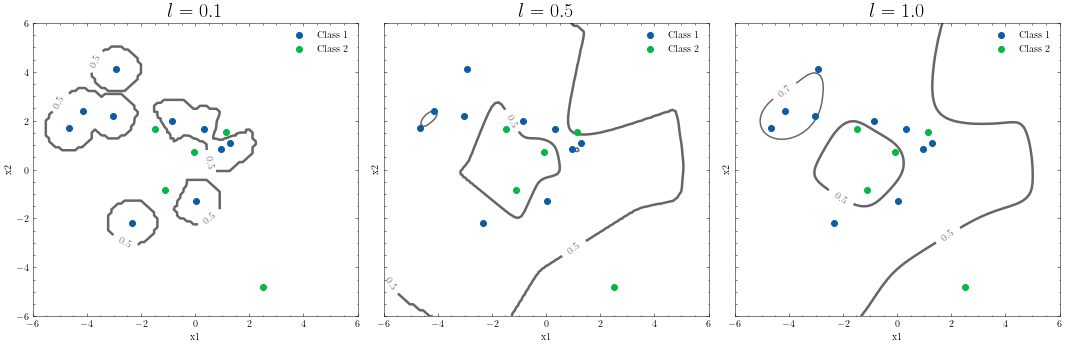

In [28]:
plot_CS(4)

plt.savefig('plots/GP_classification_lengthscale.png', dpi=300, bbox_inches='tight')

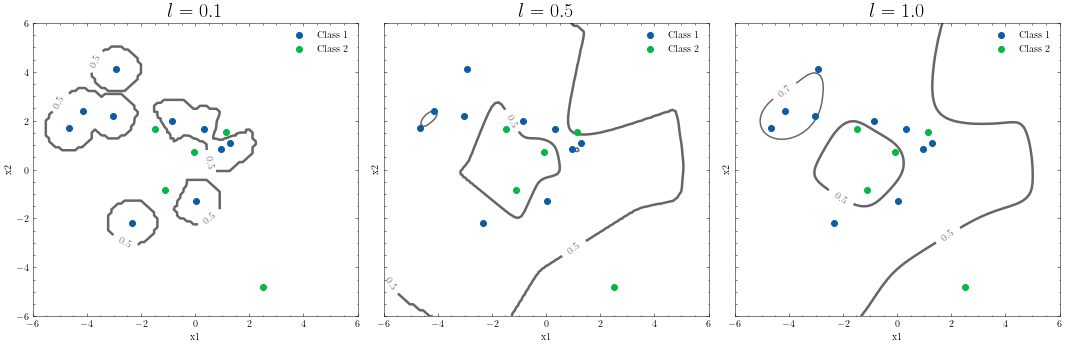

In [29]:
def plot_EP(seed):
    fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey=True)

    np.random.seed(seed)
    # Number of points in each class
    N = 10

    mu1 = np.array([-1,1])
    mu2 = np.array([2,-1])

    sigma1 = np.array([[10,0],[0,4]])
    sigma2 = np.array([[10,0],[0,10]])

    # Generate random points from a multivariate normal distribution
    X1 = np.random.multivariate_normal(mu1, sigma1, N)
    X2 = np.random.multivariate_normal(mu2, sigma2, N)
    X = np.concatenate((X1, X2))
    Y = np.concatenate((np.ones(N), -np.ones(N)))

    scales = [0.1, 0.5, 1.0]

    for i in range(3):
        kernel = GPy.kern.RBF(2, variance=1., lengthscale=scales[i], ARD=True)
        inference = expectation_propagation.EP(parallel_updates=False)
        gpc = GPy.models.GPClassification(X, Y.reshape(-1,1), kernel=kernel, inference_method=inference)
        # gpc.optimize()

        # Contour plot of the predicted probabilities
        x1 = np.linspace(-6, 6, 100)
        x2 = np.linspace(-6, 6, 100)
        x1, x2 = np.meshgrid(x1, x2)
        X_star = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1)), axis=1)
        Y_star, _ = gpc.predict(X_star)
        Y_star = Y_star.reshape(x1.shape)

        CS = axes[i].contour(x1, x2, Y_star, alpha=0.6, levels=[0.3, 0.5, 0.7], 
        colors='k', linewidths=[1.5, 2.5, 1.5])
        axes[i].clabel(CS, inline=1, fontsize=10)
        axes[i].plot(X1[:,0], X1[:,1], 'o', label='Class 1')
        axes[i].plot(X2[:,0], X2[:,1], 'o', label='Class 2')
        axes[i].legend()
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_xlim([-6,6])
        axes[i].set_ylim([-6,6])
        axes[i].set_title(f'$l = {scales[i]}$', fontsize=20)

    plt.tight_layout()

plot_EP(4)

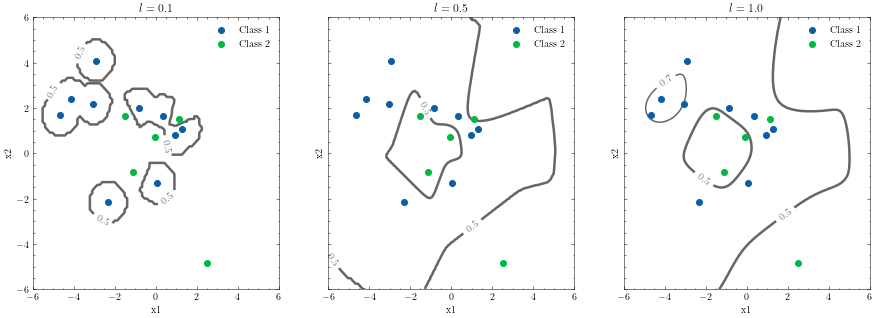

In [30]:
def plot_LA(seed):
    fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey=True)

    np.random.seed(seed)
    # Number of points in each class
    N = 10

    mu1 = np.array([-1,1])
    mu2 = np.array([2,-1])

    sigma1 = np.array([[10,0],[0,4]])
    sigma2 = np.array([[10,0],[0,10]])

    # Generate random points from a multivariate normal distribution
    X1 = np.random.multivariate_normal(mu1, sigma1, N)
    X2 = np.random.multivariate_normal(mu2, sigma2, N)
    X = np.concatenate((X1, X2))
    Y = np.concatenate((np.ones(N), -np.ones(N)))

    scales = [0.1, 0.5, 1.0]

    for i in range(3):
        kernel = GPy.kern.RBF(2, variance=1., lengthscale=scales[i], ARD=True)
        inference = laplace.Laplace()
        gpc = GPy.models.GPClassification(X, Y.reshape(-1,1), kernel=kernel, inference_method=inference)

        # Contour plot of the predicted probabilities
        x1 = np.linspace(-6, 6, 100)
        x2 = np.linspace(-6, 6, 100)
        x1, x2 = np.meshgrid(x1, x2)
        X_star = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1)), axis=1)
        Y_star, _ = gpc.predict(X_star)
        Y_star = Y_star.reshape(x1.shape)

        CS = axes[i].contour(x1, x2, Y_star, alpha=0.6, levels=[0.3, 0.5, 0.7], 
        colors='k', linewidths=[1.5, 2.5, 1.5])
        axes[i].clabel(CS, inline=1, fontsize=10)
        axes[i].plot(X1[:,0], X1[:,1], 'o', label='Class 1')
        axes[i].plot(X2[:,0], X2[:,1], 'o', label='Class 2')
        axes[i].legend()
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_xlim([-6,6])
        axes[i].set_ylim([-6,6])
        axes[i].set_title(f'$l = {scales[i]}$')

plot_LA(4)

plt.savefig('plots/GP_classification_lengthscale_LA.png', dpi=300, bbox_inches='tight')

In [ ]:
def plot_variance(seed):
    fig, axes = plt.subplots(1, 3, figsize = (15, 5), sharey=True)

    np.random.seed(seed)
    # Number of points in each class
    N = 10

    mu1 = np.array([-1,1])
    mu2 = np.array([2,-1])

    sigma1 = np.array([[10,0],[0,4]])
    sigma2 = np.array([[10,0],[0,10]])

    # Generate random points from a multivariate normal distribution
    X1 = np.random.multivariate_normal(mu1, sigma1, N)
    X2 = np.random.multivariate_normal(mu2, sigma2, N)
    X = np.concatenate((X1, X2))
    Y = np.concatenate((np.ones(N), -np.ones(N)))

    scales = [0.05, 0.3, 1.0]

    for i in range(3):
        kernel = GPy.kern.RBF(2, variance=variances[i], lengthscale=0.5, ARD=True)
        inference = laplace.Laplace()
        gpc = GPy.models.GPClassification(X, Y.reshape(-1,1), kernel=kernel, inference_method=inference)

        # Contour plot of the predicted probabilities
        x1 = np.linspace(-6, 6, 100)
        x2 = np.linspace(-6, 6, 100)
        x1, x2 = np.meshgrid(x1, x2)
        X_star = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1)), axis=1)
        Y_star, _ = gpc.predict(X_star)
        Y_star = Y_star.reshape(x1.shape)

        CS = axes[i].contour(x1, x2, Y_star, alpha=0.6, levels=[0.3, 0.5, 0.7], colors='k')
        axes[i].clabel(CS, inline=1, fontsize=10)
        axes[i].plot(X1[:,0], X1[:,1], 'o', label='Class 1')
        axes[i].plot(X2[:,0], X2[:,1], 'o', label='Class 2')
        axes[i].legend()
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_xlim([-6,6])
        axes[i].set_ylim([-6,6])
        axes[i].set_title(f'$l = {scales[i]}$')

plot_variance(4)

plt.savefig('plots/GP_classification_variance_LA.png', dpi=300, bbox_inches='tight')